## Gaussian Plume Stability Classes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gaussian_plume
import gaussian_plume_sc
import gaussian_plume_mean


from amrs.gg.tools import conversion

%matplotlib inline

In [2]:
rate = 0.2
H = 1.3


xGrid = np.arange(0.01, 500, 5)
yGrid = np.arange(-250, 250, 5)
zGrid = np.arange(0.1,500,1)

print(xGrid[10])

fcor = gaussian_plume.coriolis(47)
pointSource = gaussian_plume.pointSource(0, 0, 0, rate, H)
grid = gaussian_plume.receptorGrid(xGrid, yGrid, zGrid)

50.01


14.071790941539668
9.662168433185848
6.2480762874842375
2.5146224562095965
1.855316150543621
1.1853109267707282


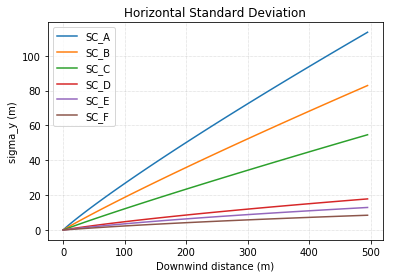

In [3]:
stabilityA = gaussian_plume_sc.stabilityClass("A")
stabilityB = gaussian_plume_sc.stabilityClass("B")
stabilityC = gaussian_plume_sc.stabilityClass("C")
stabilityD = gaussian_plume_sc.stabilityClass("D")
stabilityE = gaussian_plume_sc.stabilityClass("E")
stabilityF = gaussian_plume_sc.stabilityClass("F")

## stability classes
sy_sc_A = stabilityA.sy(xGrid)
sy_sc_B = stabilityB.sy(xGrid)
sy_sc_C = stabilityC.sy(xGrid)
sy_sc_D = stabilityD.sy(xGrid)
sy_sc_E = stabilityE.sy(xGrid)
sy_sc_F = stabilityF.sy(xGrid)


sz_sc_A = stabilityC.sz(xGrid)
sz_sc_B = stabilityB.sz(xGrid)
sz_sc_C = stabilityC.sz(xGrid)
sy_sc_D = stabilityD.sz(xGrid)
sy_sc_E = stabilityE.sz(xGrid)
sy_sc_F = stabilityF.sz(xGrid)

fig, ax = plt.subplots()
# ax.plot(xGrid, sy_surface, label = "2m")
# ax.plot(xGrid, sy_blh, label = "blh")
# ax.plot(xGrid, sy_repH, label="mean")
ax.plot(xGrid, sy_sc_A, label="SC_A")
ax.plot(xGrid, sy_sc_B, label="SC_B")
ax.plot(xGrid, sy_sc_C, label="SC_C")
ax.plot(xGrid, sy_sc_D, label="SC_D")
ax.plot(xGrid, sy_sc_E, label="SC_E")
ax.plot(xGrid, sy_sc_F, label="SC_F")
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('Downwind distance (m)')
ax.set_ylabel('sigma_y (m)')
ax.legend()
ax.set_title("Horizontal Standard Deviation")

print(sy_sc_A[10])
print(sy_sc_B[10])
print(sy_sc_C[10])
print(sy_sc_D[10])
print(sy_sc_E[10])
print(sy_sc_F[10])

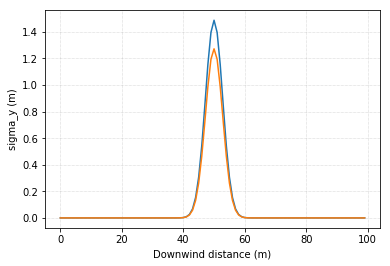

In [49]:
U = 0.5
a = gaussian_plume_sc.gaussianPlume(pointSource,grid,stabilityA,U)

concField = a.calculateConcentration()
concField = concField*1e6     ## convert concentration from g/m3 to ug/m3
ppm_conc_mean = conversion.micro2ppm(concField, mass=16.04)



# conc= [concField[5,:,10] >= 0.00001]
fig, ax = plt.subplots()
ax.plot(ppm_conc_mean[0,:,10])
ax.grid(linewidth=0.5, color="grey", linestyle="dotted", alpha=0.65)
ax.set_xlabel('Downwind distance (m)')
ax.set_ylabel('sigma_y (m)')

ax.plot(ppm_conc_mean[5,:,10])
# print(concField.shape[])

# fig = plt.figure()
# ax = fig.add_subplot(111)
# c = ax.contourf(xGrid, yGrid, concField[1,:,:],100)
# cb = fig.colorbar(c)
# cb.set_label('Concentration $[\mu g/m^3]$')
# ax.set_xlabel('X [m]')
# ax.set_ylabel('Y [m]')
# fig.show()